# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy import linalg as LA
from scipy.spatial.distance import pdist, squareform
from sklearn.svm import SVC
import random
random.seed(10)

In [2]:
# create training dataset
train_points = 1000
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

First we plot the train dataset to have an idea of how our points are distributed

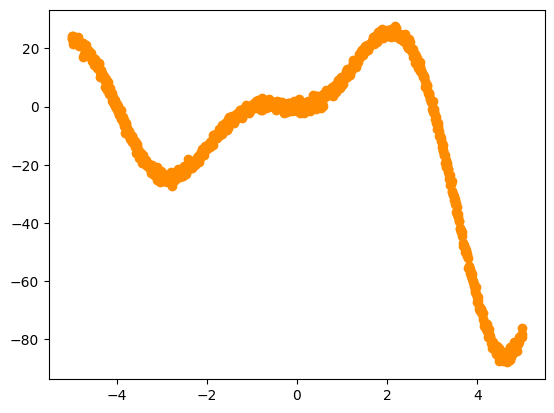

In [3]:
plt.plot(X_train, y_train, color='darkorange', marker='o')

As we can see the model generated is a polynomial model

We now remember these kernel functions:
- Polynomial $$k(x_1,x_2) = (x_1^T \cdot x_2 +1 )^p $$
- Gaussian $$k(x_1, x_2) = \exp \bigg( - \frac{||x_1-x_2||^2}{2p^2} \bigg)$$
- Linear $$k(x_1,x_2) = x_1^T \cdot x_2 $$

and write a function to calculate the kernel matrix K

In [4]:
# function to calculate the polynomial, gaussian or linear kernel matrix
def kernelFunc(x1, x2, kernel_type, param):
    
    if kernel_type == 'Polynomial':
        return pow((1 + np.dot(x1, x2)), param)
    
    elif kernel_type == 'Gaussian':
        return np.exp(-(np.dot(x1-x2,x1-x2) /2*param**2))
    
    # Linear Kernel, same as not using Kernels at all
    elif kernel_type == 'Linear':
        return np.dot(x1,x2)

We now define a function to perform Kernel Ridge Regression on our train set and to predict the labels of our test set

In [5]:
# function to create a ridge regression model with kernels
def KRRS(X_train, y_train, X_test, kernel_type, param, lam):
    
    # compute kernel matrix
    K = np.zeros((X_train.shape[0], X_train.shape[0]))
   
    for i, row in enumerate(K):
      for j, col in enumerate(K.T):
          K[i,j] = kernelFunc(X_train[i,:], X_train[j,:], kernel_type, param)

    # calculate the inverse of K with ridge regression, then the weights
    a = np.linalg.inv(K + lam * np.eye(K.shape[0]))
    w = np.dot(a, y_train) 

    # compute the predicted labels
    y_pred = np.zeros((X_test.shape[0])) 
 
    for i, x_p in enumerate(X_test):
      k = np.zeros(X_test.shape[0])
      for j, row in enumerate(k):
          k[j] = kernelFunc(x_p, X_test[j,:], kernel_type, param)
      y_pred[i] = np.dot(k, w)

    return y_pred

#### Linear Kernel 

In [6]:
# ridge regression model with linear kernel
y_pred = KRRS(X_train, y_train, X_test, 'Linear', 1, 0.1)

# calculate root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f"The RMSE is {round(RMSE, 5)}")

The RMSE is 28.58674


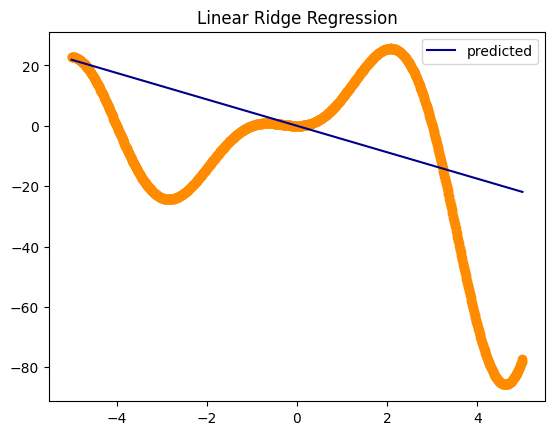

In [7]:
# plotting  
plt.plot(X_test, y_test, color='darkorange', marker='o')
plt.plot(X_test, y_pred, label = 'predicted', color='darkblue')
plt.title(f"Linear Ridge Regression")
plt.legend()

# plot   
plt.show()

As expected, the linear kernel is as equivalent as not using a kernel, so this is a representation of a linear ridge regression model

#### Polynomial Kernel

In [8]:
# function to plot ridge kernel regression with polynomial kernels and different parameterers
def plot_polynomial(gamma_array, lambda_array):

    # plotting parameters
    plt.figure(figsize=(20, 25))
    fig, ax = plt.subplots(5, 5, figsize = (12, 12))

    # indexes for plotting
    row = 0
    col = 0
    
    # decided to check how the kernel works with 10 different parameters (from 1 to 10)
    for i in gamma_array:
        col = 0
        for j in lambda_array:

            # predicting the points and calculating the root mean square error in order to determine the quality of the model
            y_pred = KRRS(X_train, y_train, X_test, 'Polynomial', i, j)
            RMSE = mean_squared_error(y_test, y_pred, squared=False)
            
            # plotting
            ax[row, col % 5].plot(X_test, y_test, color='darkorange', marker='o')
            ax[row, col % 5].plot(X_test, y_pred, label = 'predicted', color='darkblue')

            # different parameters for the plot
            ax[row, col % 5].set_title(f"gamma: {i}, lambda: {j}, RMSE: {round(RMSE, 5)}", fontsize = 8)
            ax[row, col % 5].legend()

            col += 1
        row += 1

    # plot   
    plt.tight_layout()
    plt.show()

<Figure size 2000x2500 with 0 Axes>

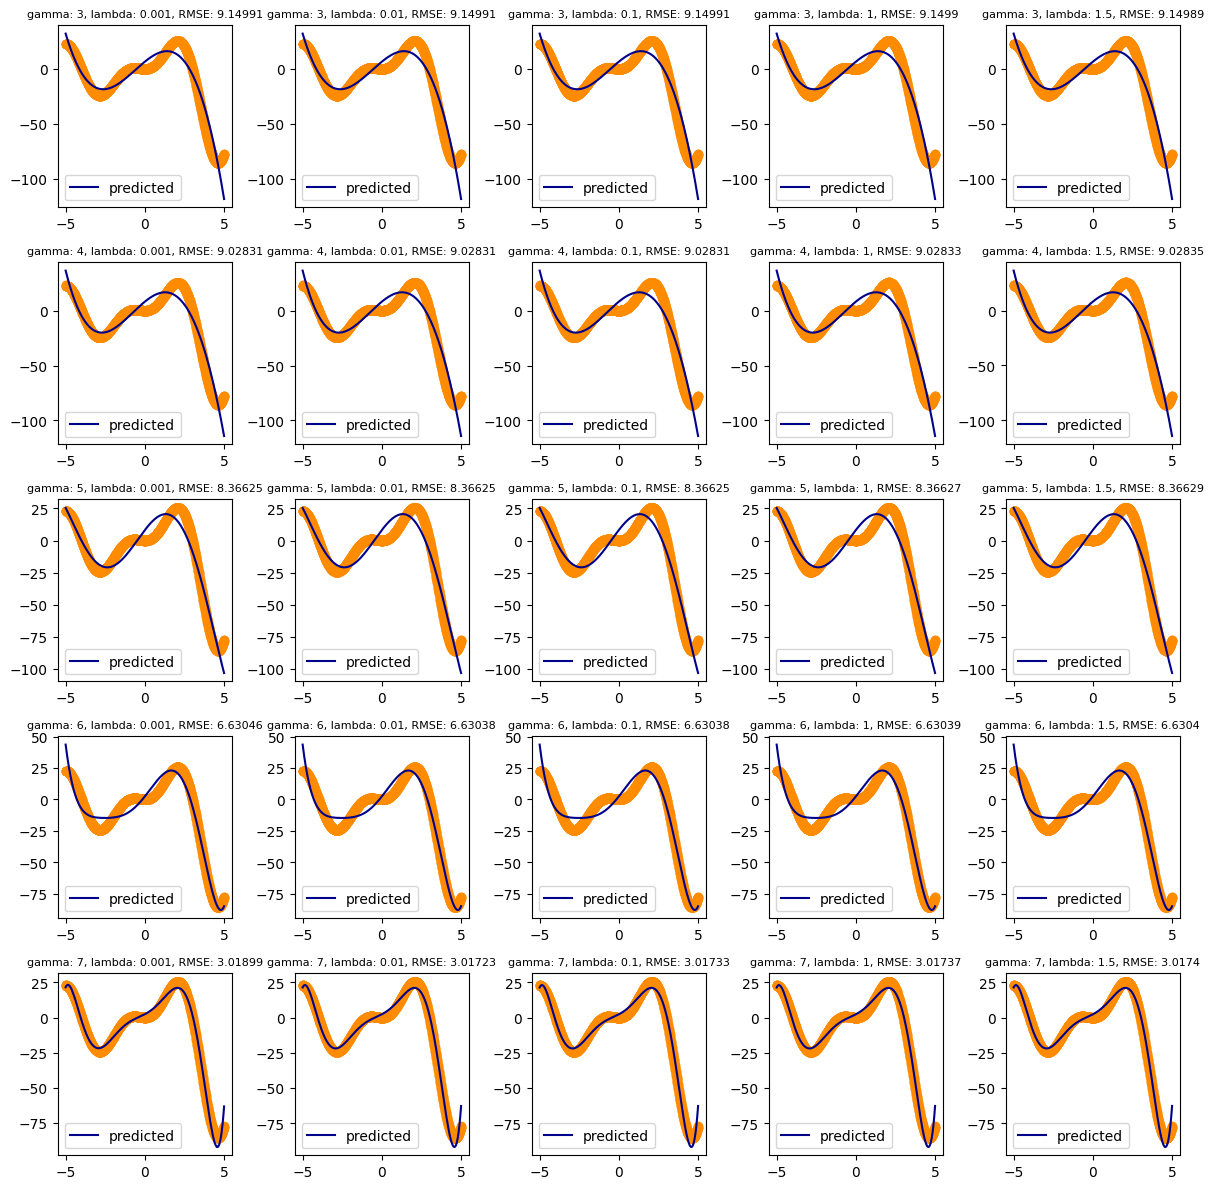

In [9]:
gamma_array = [3, 4, 5, 6, 7]
lambda_array = [0.001, 0.01, 0.1, 1, 1.5]
plot_polynomial(gamma_array, lambda_array)

As we know, by increasing the value of the polynomial degree (gamma) we obtain a better fitting of the model, but with a value too high we could overfit the model, so it is important to choose it properly. In our case, by seeing the root mean squared error associated to gamma and lambda values, with just a gamma value equal to 3 we obtain a good RMSE, but observing the behaviour of the points after the convexity-change in x = 5 (approximately), the only function that follows the trend correctly is the one with gamma = 6. <br>
It is also a good value under the aspect of the bias-variance trade off. <br><br>
For what lambda concerns, the best result is obtained with the minimum lambda value used, so, in our case, lambda = 0.001 minimizes the RMSE, considering gamma = 6.

#### Gaussian kernel

In [10]:
# function to plot ridge kernel regression with gaussian kernels and different parameterers
def plot_gaussian(gamma_array):
    # plotting parameters
    plt.figure(figsize=(12,7))

    # index for plotting
    j = 1
    
    # decided to check how the kernel works with 10 different parameters (from 1 to 10)
    for i in gamma_array:
        # predicting the points and calculating the root mean square error in order to determine the quality of the model
        y_pred = KRRS(X_train, y_train, X_test, 'Gaussian', i, 0.1)
        RMSE = mean_squared_error(y_test, y_pred, squared=False)
        
        # different parameters for the plot
        plt.subplot(2, 3, j)
        plt.plot(X_test, y_test, color='darkorange', marker='o')
        plt.plot(X_test, y_pred, label = 'predicted', color='darkblue')
        plt.title(f"gamma: {i}, RMSE: {round(RMSE, 5)}")
        plt.legend()

        j+= 1

    # plot   
    plt.tight_layout()
    plt.show()

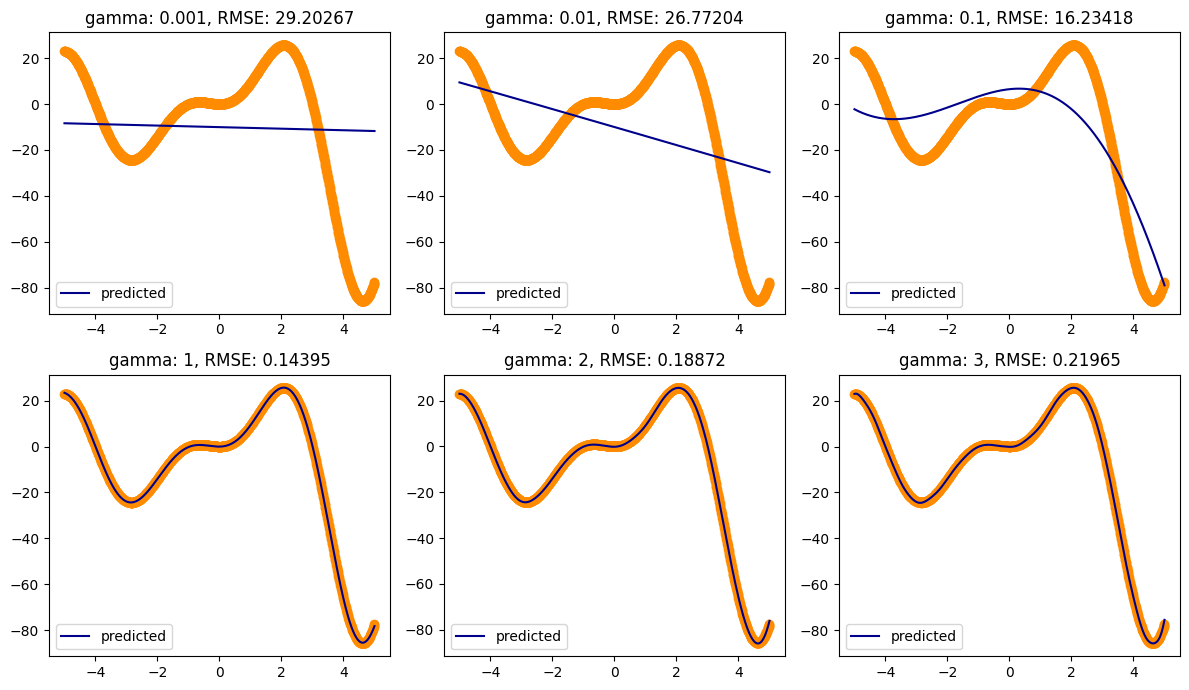

In [11]:
gamma_array = [0.001, 0.01, 0.1, 1, 2, 3]
plot_gaussian(gamma_array)

On the other hand, the gaussian kernel model has a much better fitting, with a really low RMSE value for each gamma adopted.<br> Thus, the more gamma increases, the more the RMSE increses, so we decide to choose a gamma value of 1

### Best model

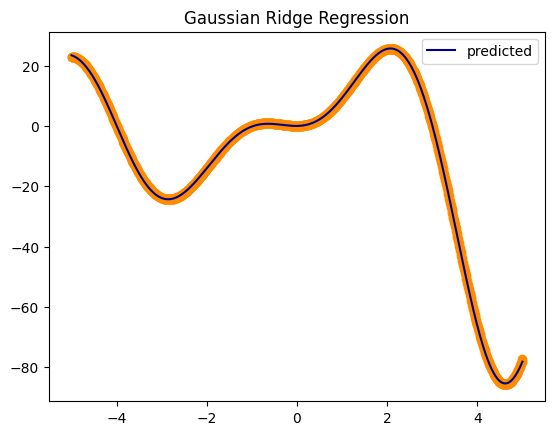

In [12]:
y_pred = KRRS(X_train, y_train, X_test, 'Gaussian', 1, 0.1)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

# plotting  
plt.plot(X_test, y_test, color='darkorange', marker='o')
plt.plot(X_test, y_pred, label = 'predicted', color='darkblue')
plt.title(f"Gaussian Ridge Regression")
plt.legend()

# plot
plt.show()

In [13]:
# calculate root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f"The RMSE is {round(RMSE, 5)}")

The RMSE is 0.14395


As we said earlier the best Ridge Regression model is obtained with the usage of the Gaussian Kernel with gamma = 1

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [14]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

In [15]:
print(f'First 10 items: {y[:10]}')
print(f'Last 10 items: {y[-10:]}')

First 10 items: [1 1 0 1 1 1 0 0 0 1]
Last 10 items: [1 0 0 1 1 1 0 1 1 1]


After printing the first and the last 10 elements of the class, we decided to do not shuffle the dataset beacuse there doesn't seem to be any sort of ordering.<br><br>
Then we plot our dataset in order to have a visual representation

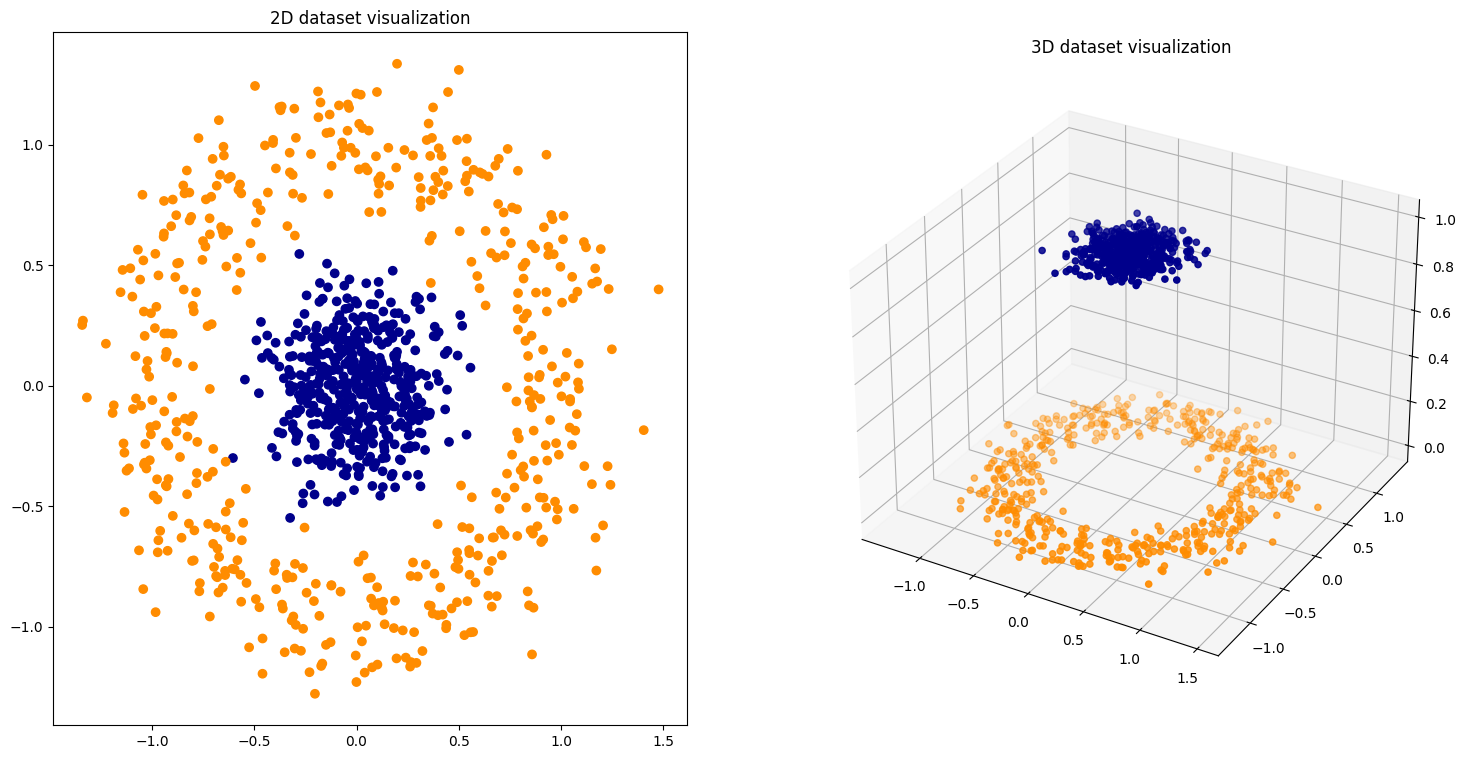

In [16]:
# creating the plot
fig = plt.figure(figsize=(18,9))

colors = ['darkorange' if label == 0 else 'darkblue' for label in y]

# 2d plot
ax1 = fig.add_subplot(1, 2, 1)
scat1 = ax1.scatter(X[:, 0], X[:, 1], c=colors)
ax1.set_title('2D dataset visualization')

# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
scat2 = ax2.scatter(X[:, 0], X[:, 1], y, c=colors)
ax2.set_title('3D dataset visualization')

plt.show()

Since the number of features of our dataset is two, the dimensionality reduction could be used in case just one feature permits to have a good explained variance, and this is what we are going to verify. <br><br>
Moreover, PCA is also useful in order to have a better understanding of our dataset

Eigenvalues: [0.29061536 0.28020321]


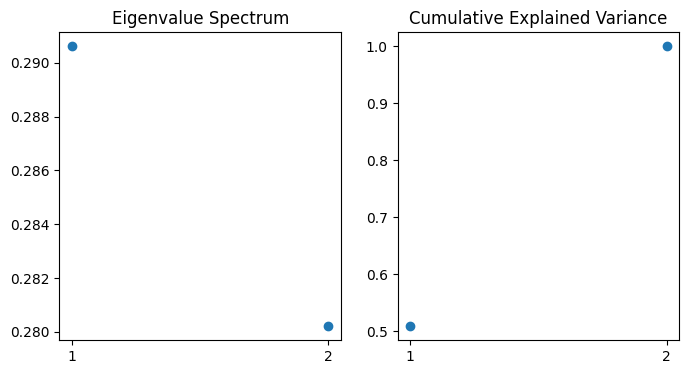

In [17]:
from sklearn.decomposition import PCA

# Performing Principal Component Analysis (PCA) using sklearn
pca = PCA()

# Fitting the PCA model to the scaled data
pca.fit(X_train)

# Transforming the original data to the principal components
projection = pca.transform(X_train)

nc = X_train.shape[1]

# Calculating the cumulative explained variance ratio
cumulative_variance = np.zeros(nc)
for i in range(nc):
    cumulative_variance[i] = np.sum(pca.explained_variance_ratio_[:i+1])

# Extracting eigenvalues and component indices
eigenvalues = pca.explained_variance_
components  = np.arange(nc) + 1

print(f'Eigenvalues: {eigenvalues}')

# Creating subplots
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 4))

# Plotting the Spectrum
ax1.set_title('Eigenvalue Spectrum')
ax1.scatter(components, eigenvalues)
ax1.set_xticks(components)

# Plotting the Cumulative Explained Variance
ax2.set_title('Cumulative Explained Variance')
ax2.scatter(components, cumulative_variance)
ax2.set_xticks(components)

# Displaying the plots
plt.show()

Here we can see how with just one component the explained variance is approximately equal to 0.5, while with two components is close to 1.0 

Explained Variance Threshold: 0.5, Number of Components: 1
Explained Variance Threshold: 0.6, Number of Components: 2
Explained Variance Threshold: 0.7, Number of Components: 2
Explained Variance Threshold: 0.8, Number of Components: 2
Explained Variance Threshold: 0.8, Number of Components: 2
Explained Variance Threshold: 0.9, Number of Components: 2
Explained Variance Threshold: 0.95, Number of Components: 2
Explained Variance Threshold: 0.97, Number of Components: 2
Explained Variance Threshold: 0.99, Number of Components: 2
Explained Variance Threshold: 0.999, Number of Components: 2


Text(0, 0.5, 'Number of components')

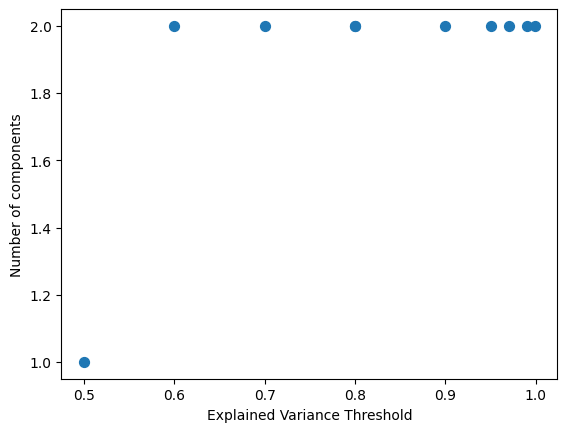

In [18]:
# Determine the number of components based on different explained variance thresholds.
thresholds_list = [0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 0.95, 0.97, 0.99, 0.999]
num_components_list = []

for threshold in thresholds_list:
    # Find the index where cumulative variance exceeds the threshold
    num_components = np.argmax(cumulative_variance - threshold > 0.) + 1
    num_components_list.append(num_components)

    # Print the threshold and the corresponding number of components
    print(f"Explained Variance Threshold: {threshold}, Number of Components: {num_components}")
    
plt.scatter(thresholds_list, num_components_list, s = 50)
plt.xlabel('Explained Variance Threshold')
plt.ylabel('Number of components')

This is the proof of what we said above about the explained variance.

We now move on with the PCA plot

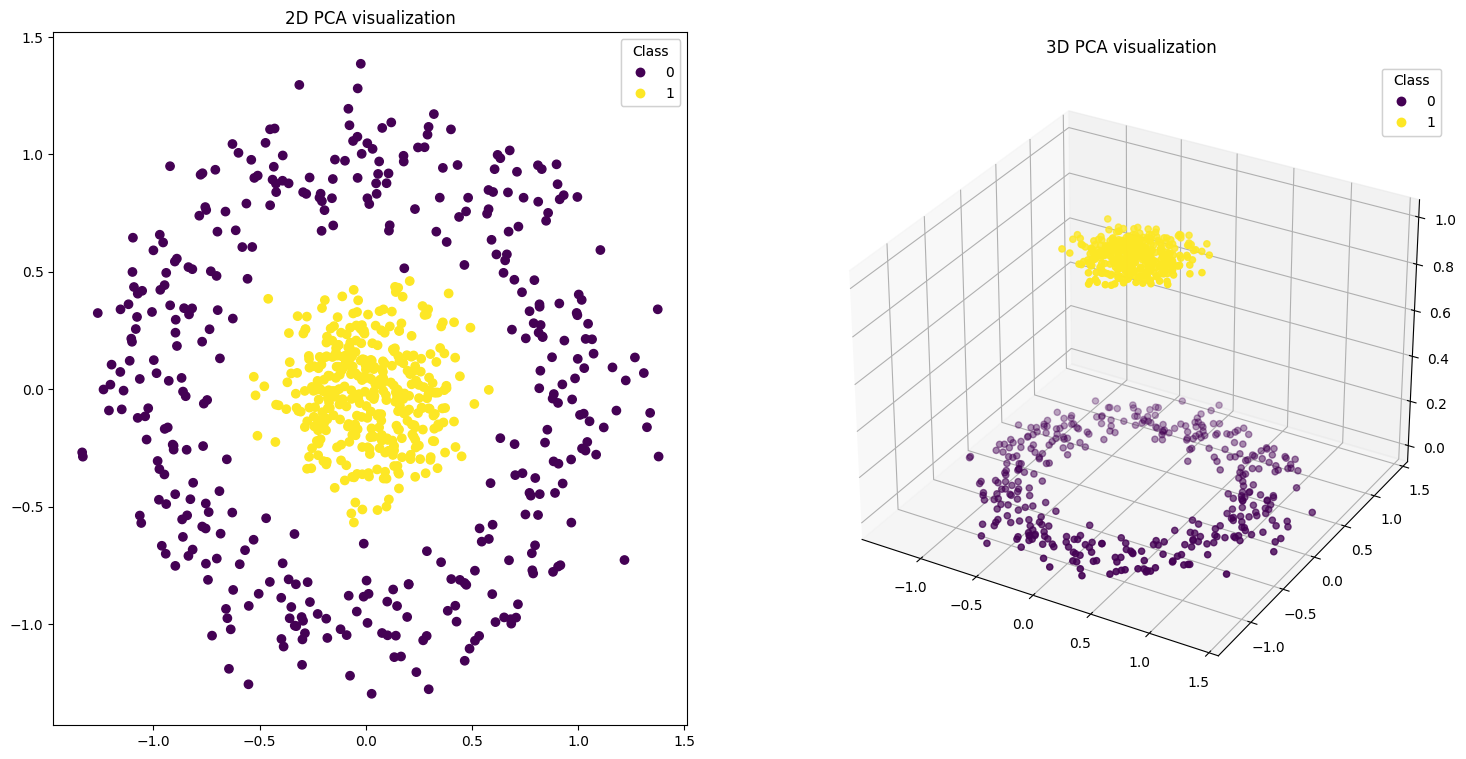

In [19]:
# creating the plot
fig = plt.figure(figsize=(18,9))

# 2d plot
ax1 = fig.add_subplot(1, 2, 1)
scat1 = ax1.scatter(projection[:, 0], projection[:, 1], c=y_train)
ax1.set_title('2D PCA visualization')
legend1 = ax1.legend(*scat1.legend_elements(), title="Class")
ax1.add_artist(legend1)
 
# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
scat2 = ax2.scatter(projection[:, 0], projection[:, 1], y_train, c=y_train)
ax2.set_title('3D PCA visualization')
legend2 = ax2.legend(*scat2.legend_elements(), title="Class")
ax2.add_artist(legend2)

plt.show()

From these two plots it is evident that there could be a separation between the two clusters. <br><br>
So let's now try to get a better result by using PCA with a Gaussian Kernel (RBF).

### RBF Kernel PCA

Let's start by building our function to implement a RBF kernel PCA

In [20]:
def kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = LA.eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack([eigvecs[:,-i] for i in range(1,n_components+1)])

    return X_pc

#### Kernel SVM

We proceed to implement a SVM model to solve our binary classification problem and check the accuracy

In [21]:
# function to calculate accuracy of SVM
def acc(labels, predlabels):
     return np.count_nonzero(labels == predlabels)/len(labels) 

In [22]:
# different gamma values to choose from
param_grid = {'gamma': [0.1, 0.8, 0.9, 1, 2, 3, 4, 5]}

# creating our svm model and performing grid search to get the best gamma value
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# printing the best gamma value and its score
print(f"Best parameter is {grid_search.best_params_}")

# counter proof with the sklearn method
y_pred_sk = grid_search.predict(X_test)
print('Accuracy: ', acc(y_test, y_pred_sk))

Best parameter is {'gamma': 0.8}
Accuracy:  0.996


The results furnished by the grid search are that the best gamma value is 0.8, and we obtain an accuracy of 99.6%

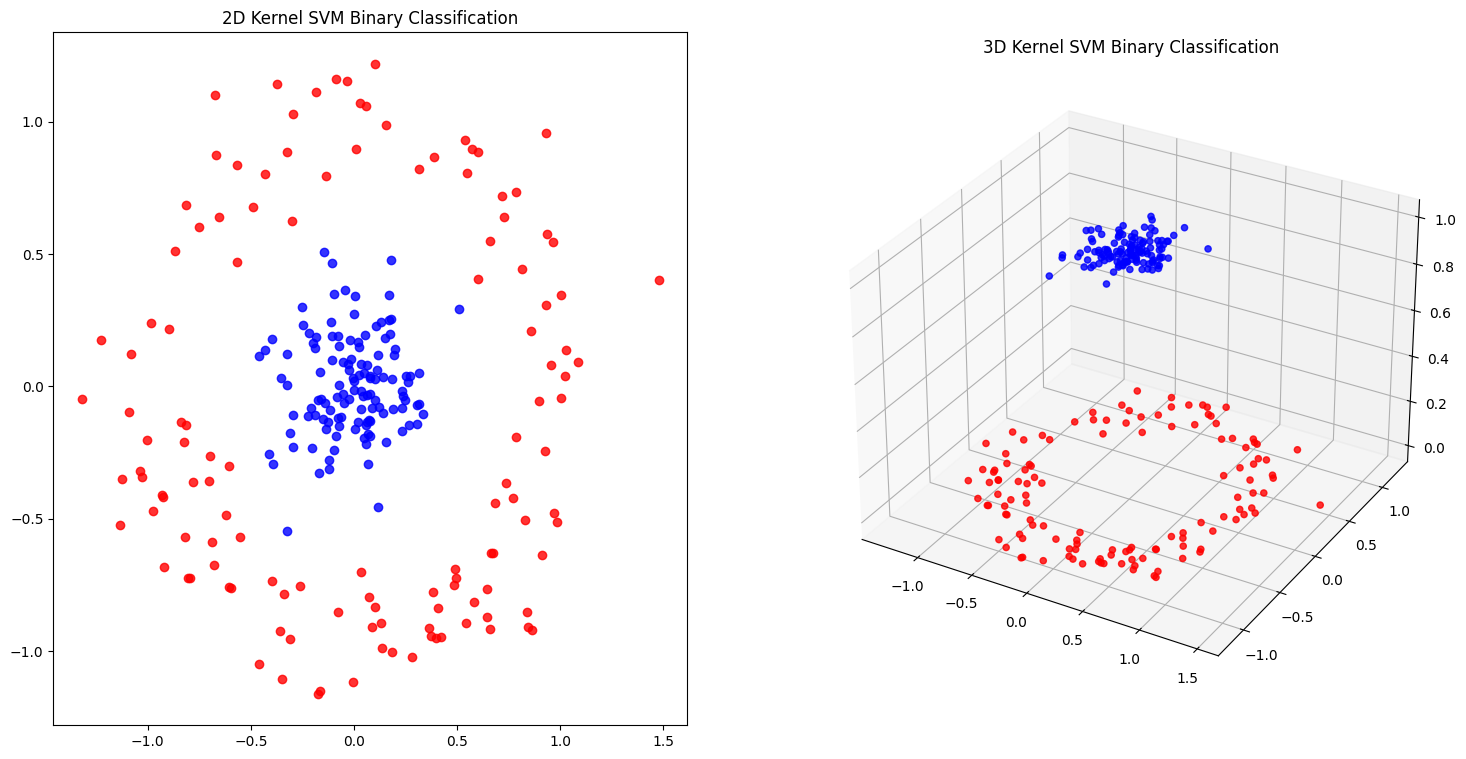

In [23]:
# creating the plot
fig = plt.figure(figsize=(18, 9))

# 2d plot
ax1 = fig.add_subplot(121)
ax1.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.8, label='class 0')
ax1.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.8, label='class 1')
ax1.set_title('2D Kernel SVM Binary Classification')
 
# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
colors = ['red' if label == 0 else 'blue' for label in y_pred_sk]
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred_sk, c=colors, alpha=0.8, label='class 0')
ax2.set_title('3D Kernel SVM Binary Classification')

plt.show()

We can now apply the RBF Kernel PCA with a gamma value of 0.8 and plot our 2 principal components

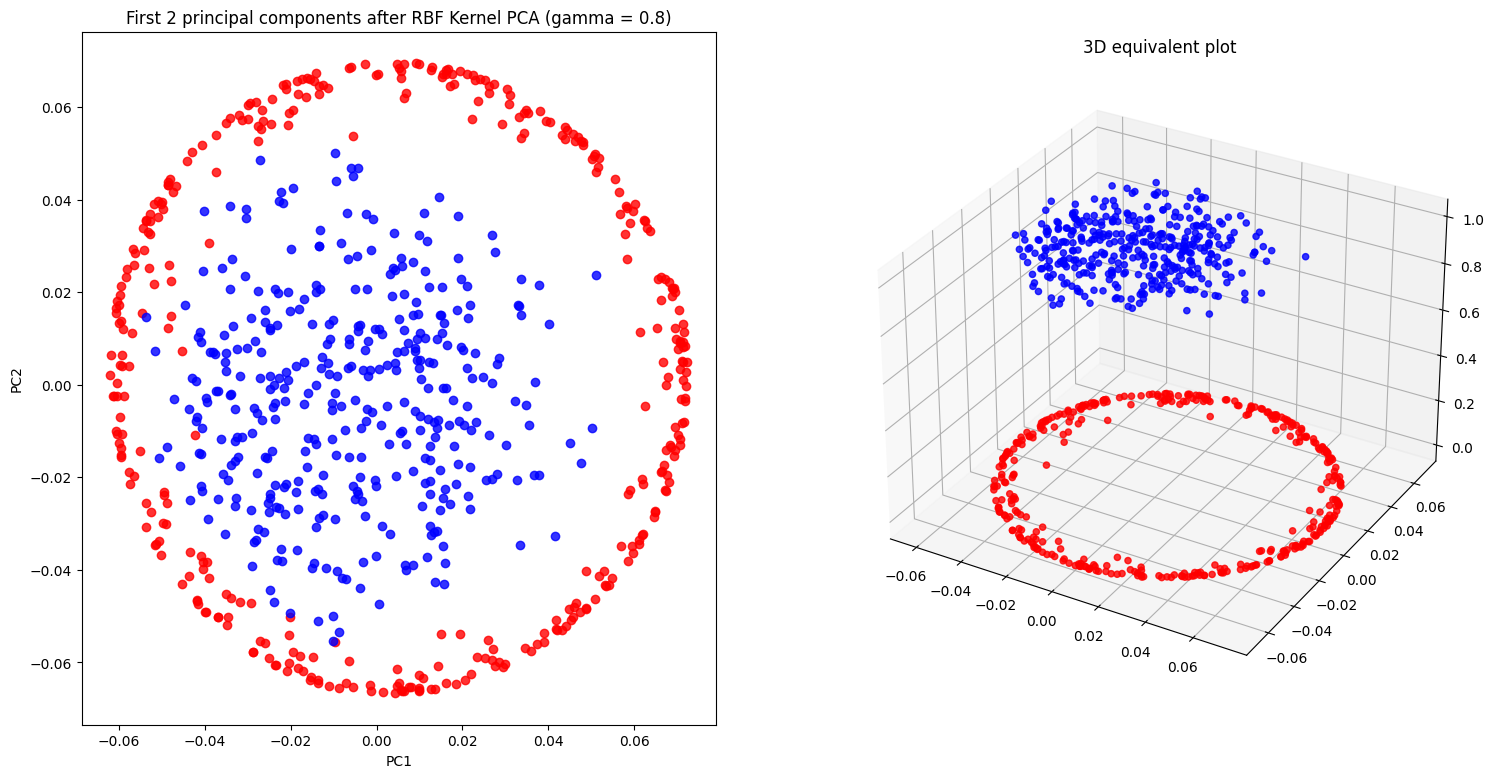

In [24]:
X_pc = kpca(X_train, gamma=0.8, n_components=2)

# creating the plot
fig = plt.figure(figsize=(18, 9))

# 2d plot
ax1 = fig.add_subplot(121)
ax1.scatter(X_pc[y_train==0, 0], X_pc[y_train==0, 1], color='red', alpha=0.8)
ax1.scatter(X_pc[y_train==1, 0], X_pc[y_train==1, 1], color='blue', alpha=0.8)
ax1.set_title('First 2 principal components after RBF Kernel PCA (gamma = 0.8)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
 
# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
colors = ['red' if label == 0 else 'blue' for label in y_train]
ax2.scatter(X_pc[:, 0], X_pc[:, 1], y_train, c=colors, alpha=0.8, label='class 0')
ax2.set_title('3D equivalent plot')

plt.show()

As we can notice, the principal effect obtained by using the RBF kernel with gamma = 0.8 is that there are some "red points" which could belong to the cluster of the "blue points" under the geometric point of view, but they're correctly classified in the class of the red points.<br><br>
There is also a clear pattern in the red points' cluster.

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

In [25]:
from sklearn import datasets

# create a random 2-class classification problem with a 1000 of samples, 20 features and with a random state of 10
X, y = datasets.make_classification(n_samples=1000, n_classes=2, random_state=10)

# train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

Let's test our dataset with 3 SVM models:
- Linear Kernel
- Polynomial Kernel
- Radial Kernel

### Linear Kernel

In [26]:
# different gamma values to choose from
param_grid = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

# creating our svm model and performing grid search to get the best gamma value
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# printing the best gamma value and its score
print(f"Best parameter is {grid_search.best_params_}")

# counter proof with the sklearn method
y_pred_sk = grid_search.predict(X_test)
print('Accuracy: ', acc(y_test, y_pred_sk))

Best parameter is {'gamma': 1e-05}
Accuracy:  0.876


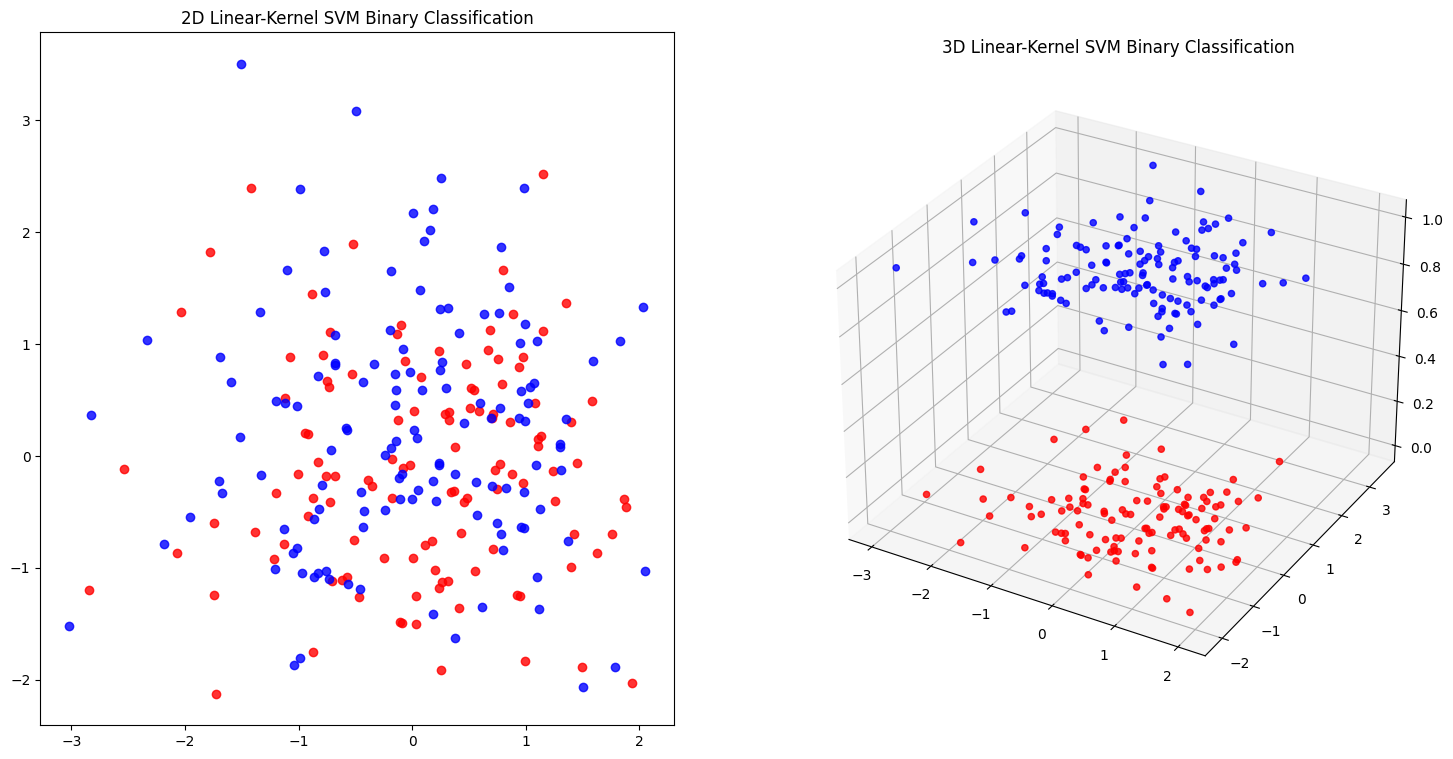

In [27]:
# plotting our SVM model
fig = plt.figure(figsize=(18, 9))

# 2d plot
ax1 = fig.add_subplot(121)
ax1.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.8, label='class 0')
ax1.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.8, label='class 1')
ax1.set_title('2D Linear-Kernel SVM Binary Classification')
 
# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
colors = ['red' if label == 0 else 'blue' for label in y_pred_sk]
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred_sk, c=colors, alpha=0.8, label='class 0')
ax2.set_title('3D Linear-Kernel SVM Binary Classification')

plt.show()

### Polynomial Kernel

In [28]:
# different gamma values to choose from
param_grid = {'gamma':[0.001, 0.01, 0.1, 1]}

# creating our svm model and performing grid search to get the best gamma value
svm = SVC(kernel='poly')
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# printing the best gamma value and its score
print(f"Best parameter is {grid_search.best_params_}")

# counter proof with the sklearn method
y_pred_sk = grid_search.predict(X_test)
print('Accuracy: ', acc(y_test, y_pred_sk))

Best parameter is {'gamma': 0.1}
Accuracy:  0.796


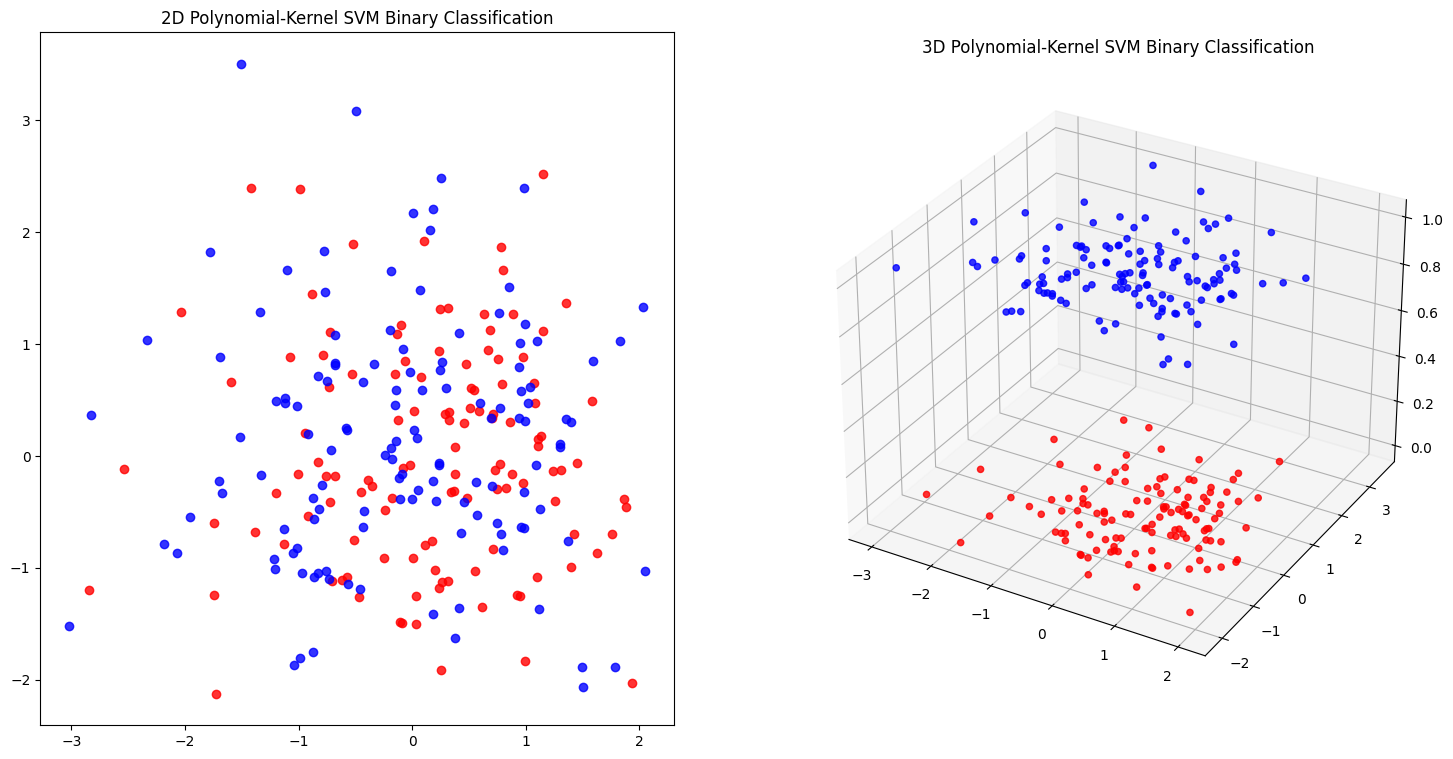

In [29]:
# plotting our SVM model
fig = plt.figure(figsize=(18, 9))

# 2d plot
ax1 = fig.add_subplot(121)
ax1.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.8, label='class 0')
ax1.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.8, label='class 1')
ax1.set_title('2D Polynomial-Kernel SVM Binary Classification')
 
# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
colors = ['red' if label == 0 else 'blue' for label in y_pred_sk]
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred_sk, c=colors, alpha=0.8, label='class 0')
ax2.set_title('3D Polynomial-Kernel SVM Binary Classification')

plt.show()

### Radial Kernel

In [30]:
# different gamma values to choose from
param_grid = {'gamma':[0.001, 0.01, 0.1, 1]}

# creating our svm model and performing grid search to get the best gamma value
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# printing the best gamma value and its score
print(f"Best parameter is {grid_search.best_params_}")

# counter proof with the sklearn method
y_pred_sk = grid_search.predict(X_test)
print('Accuracy: ', acc(y_test, y_pred_sk))

Best parameter is {'gamma': 0.01}
Accuracy:  0.892


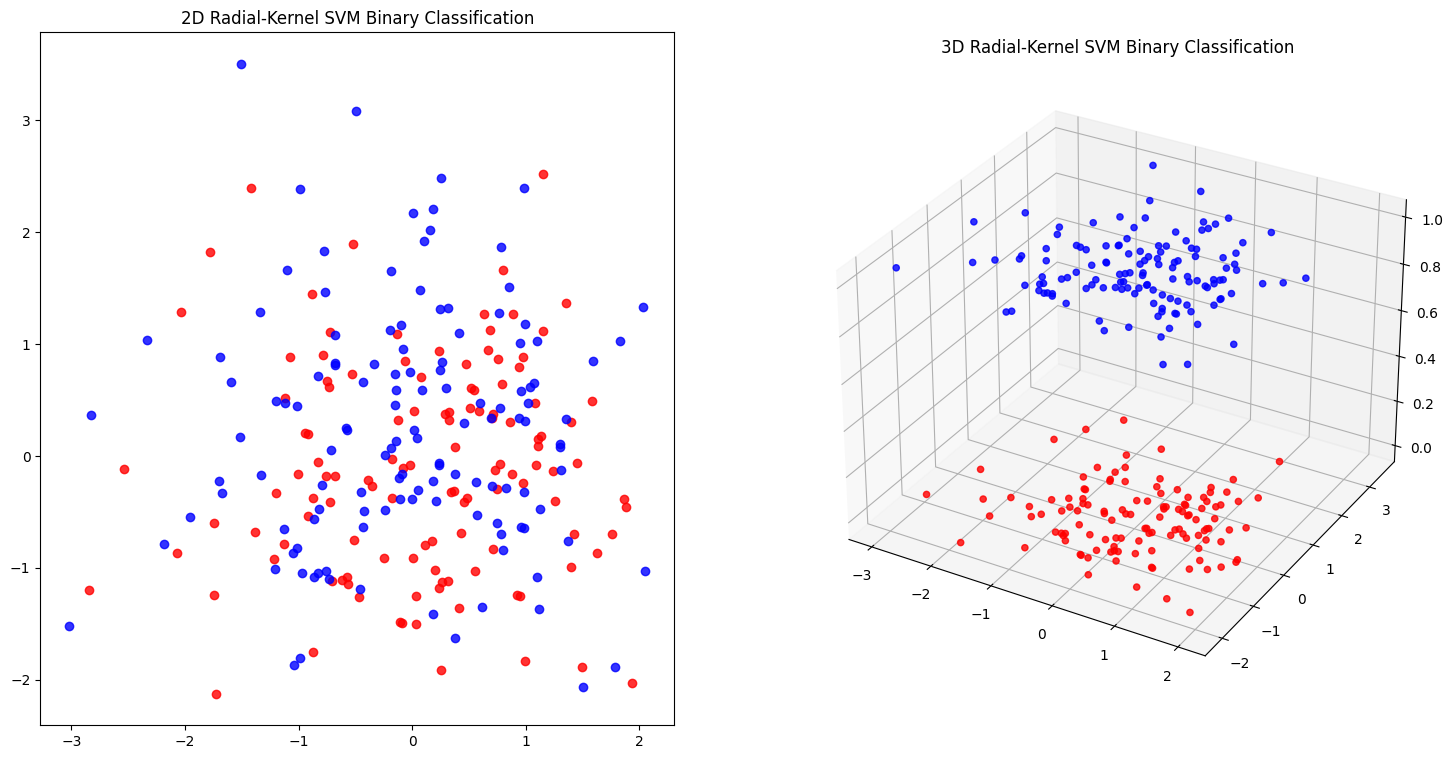

In [31]:
# plotting our SVM model
fig = plt.figure(figsize=(18, 9))

# 2d plot
ax1 = fig.add_subplot(121)
ax1.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.8, label='class 0')
ax1.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.8, label='class 1')
ax1.set_title('2D Radial-Kernel SVM Binary Classification')
 
# 3d plot
ax2 = fig.add_subplot(122, projection='3d')
colors = ['red' if label == 0 else 'blue' for label in y_pred_sk]
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred_sk, c=colors, alpha=0.8, label='class 0')
ax2.set_title('3D Radial-Kernel SVM Binary Classification')

plt.show()

Here we report the three accuracies obtained using the different kernels:
- Linear Kernel: 0.876
- Polynomial Kernel: 0.796
- Radial Kernel: 0.892

By observing the results it is possible to establish which is the most efficient kernel to use, in this case the RBF kernel.